In [3]:
from model import VAD
import torch
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [4]:
vad = VAD.load_model('./logs/ckpts/epoch20.pth.tar')

In [3]:
a = torch.ones(1, 640)

In [5]:
res = np.zeros(160000)
sample, sr = sf.read('/home/jhkim21/IITP/2022/AGC/AGC_IITP/sample/raw/nearend_speech_fileid_1.wav')
vad.eval()
for i in range(250):
    in_buffer = torch.Tensor(sample[i*640:(i+1)*640]).unsqueeze(0)
    a = vad(in_buffer).detach().cpu().numpy().squeeze()
    res[i*640:(i+1)*640] = np.argmax(a)

In [26]:
for i in range(250):
    res[i*640:(i+1)*640] = np.argmax(a[i])

IndexError: index 2 is out of bounds for axis 0 with size 2

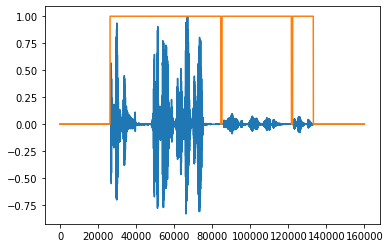

In [6]:
plt.plot(sample)
plt.plot(res)